# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np

In [2]:
# Create two new dataframes
n = pd.read_csv("./NorthCallCenter.csv")
s = pd.read_csv("./SouthCallCenter.csv")
n.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
# EDA Question 1A solution below:
print(f"There are {len(n['Rep ID'].unique())} reps in the North Branch.")

There are 9 reps in the North Branch.


#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
# EDA Question 1B solution Below:
print(f"There are {len(s['Rep ID'].unique())} reps in the South Branch.")

There are 11 reps in the South Branch.


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
def to_minutes(num):
    result = ""
    result += str(int(num//1)) + ":" + str(int(((num%1)*60)))
    if len(str(int(((num%1)*60)))) == 1:
        result += "0"
    return result

In [135]:
# EDA Question 2A solution Below:
print(f"[N]          Avg 'Busy Minutes': {to_minutes(np.average(n["Busy Minutes"]))}")
print(f"[N]     Avg 'Not Ready Minutes': {to_minutes(np.average(n["Not Ready Minutes"]))}")
print(f"[N]    Avg 'Incoming Wait Time': {np.average(n[n["Incoming or Outgoing"] == "Incoming"]["Incoming Wait Time"])} sec")
print(f"[N] Avg 'During Call Wait Time': {to_minutes(np.average(n["During Call Wait Time"]))}")


[N]          Avg 'Busy Minutes': 9:59
[N]     Avg 'Not Ready Minutes': 1:54
[N]    Avg 'Incoming Wait Time': 3.048780487804878 sec
[N] Avg 'During Call Wait Time': 2:58


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [134]:
# EDA Question 2B solution Below:
print(f"[S]          Avg 'Busy Minutes': {to_minutes(np.average(s["Busy Minutes"]))}")
print(f"[S]     Avg 'Not Ready Minutes': {to_minutes(np.average(s["Not Ready Minutes"]))}")
print(f"[S]    Avg 'Incoming Wait Time': {np.average(s[s["Incoming or Outgoing"] == "Incoming"]["Incoming Wait Time"])} sec")
print(f"[S] Avg 'During Call Wait Time': {to_minutes(np.average(s["During Call Wait Time"]))}")


[S]          Avg 'Busy Minutes': 10:30
[S]     Avg 'Not Ready Minutes': 1:54
[S]    Avg 'Incoming Wait Time': 3.0 sec
[S] Avg 'During Call Wait Time': 3:40


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [8]:
# EDA Question 3 solution Below:
print(pd.concat((n,s))["Time Block"].value_counts())

Time Block
12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: count, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9:59
> - Not Ready Minutes = 1:54
> - Incoming Wait Time = 3:20
> - During Call Wait Time = 2:58
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10:30
> - Not Ready Minutes = 1:54
> - Incoming Wait Time = 3:00
> - During Call Wait Time = 3:40
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

#### Record your answer below:

> Your Answer: Yes, there are missing data - "Incoming Wait Time" is missing for outgoing calls. The data could be set to a None value to be easier to work with or left as-is. While immediate instinct may be to fill the value in as a 0 or -1, the None value will either be excluded from well-written functions or throw an error where the data would have otherwise erroneously be factored into a calculation. I.e. if it were a 0 or -1 and we forgot the dummy value, aggregate functions would still use it and produce incorrect data, leadeing us to incorrect conclusions.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [9]:
# Cleaning Question 2 solution below:
n["Sale"].value_counts()

Sale
NO      234
YES      10
YES       1
Name: count, dtype: int64

In [10]:
n["Sale"] = n["Sale"].str.strip()

In [11]:
n["Sale"].value_counts()

Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: 
 Counted the values. Noticed two instances of "YES". Initial instinct is that one has spaces on one side, so I verified by checking through NorthCallCenter.csv. The values were then replaced by setting the values in the "Sale" column to the space-stripped versions using the strip() method.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [12]:
# Cleaning Question 3 solution below:
n_drop = n.iloc[:, n.columns != n.columns[0]]
n[n_drop.duplicated()].head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [13]:
s_drop = s.iloc[:, n.columns != n.columns[0]]
s[s_drop.duplicated()].head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [14]:
# Checking a suspicion regarding one of the duplicates
s[s["Rep ID"] == "Randy"][s["Time Block"] == "11:00 AM"]

C:\Users\fpose\AppData\Local\Temp\ipykernel_7988\23330614.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s[s["Rep ID"] == "Randy"][s["Time Block"] == "11:00 AM"]


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
15,15,South,Complaint,11:00 AM,Incoming,D,Randy,NO,0,0,12,3,1.0,4,1
166,166,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
170,170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
171,171,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,2,NaN,3,1
173,173,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,11,2,NaN,2,1


In [15]:
# Suspicion confirmed. *Assuming* the other duplicates are of a similar nature, they will be removed
s_drop.drop_duplicates(inplace=True)
n_drop.drop_duplicates(inplace=True)

C:\Users\fpose\AppData\Local\Temp\ipykernel_7988\2853798343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_drop.drop_duplicates(inplace=True)
C:\Users\fpose\AppData\Local\Temp\ipykernel_7988\2853798343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_drop.drop_duplicates(inplace=True)


##### Record your answer below:

There are duplicates in the data sets. The possibilities are that the data is erroneously entered by a human, automatically entered by a system, or some combination of the two (i.e. human using a program, accidentally presses the button responsible for logging the data twice). The existence of a typo within the data (ref. "YES " vs. "YES") suggests some human error is possible for the data in regards to entry, though most of the other information (including the Sale column) seem to be entirely consistent (suggesting the error in the Sale column means that there's human entry that could be automated to accelerate the process slightly). In conjunction with the automation of the queue and automated assignments, it's believable that they utilize an automated system for most of the information entry. 

Initial exploration of the data supported this theory - the number of calls, including the seeming duplicate, were within reasonable bounds during that time period, and were roughly similar to the other employees' values. The values being so similar (7-12 range for incoming wait time, 1-3 on not ready minutes, etc.) meant that it's reasonable the call could just be similar. However, when adding together the minutes in these 1 hour period, the values add up to more than 60 minutes, representing the period. The difference was about equivalent to the summed times of the duplicated call, suggesting that the duplicated call was input erroneously. 

In the future, this could be automatically amended with an algorithm that runs over the data, finds likely duplicates, calculates the sum based off the total minutes, then either flags or removes the duplicate row/value.

For the time being, all the duplicates were removed under assumption that a similar (albeit simulated and more predictable) error was made with those as well.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [16]:
# Cleaning Question 4 solution below:
print(n_drop["Calls"].value_counts())
print(s_drop["Calls"].value_counts())

Calls
1    243
Name: count, dtype: int64
Calls
1    311
Name: count, dtype: int64


In [ ]:
n_clean = n_drop#.drop('Calls', axis = 1)
s_clean = s_drop#.drop('Calls', axis = 1)
# NB: The drop of 'Calls' was commented-out due to code later in the assignment being reliant on the 'Calls' as a counting mechanism, 
    # and I didn't want to rewrite the entire thing. In the future, it may be prudent to rely on counting or length-checking rather 
    # than summing on the assumed existence of a column that may be removed and would otherwise be useless.

n_clean.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


##### Record your answer below:
> Your Answer: The "Calls" column is not relevant information in this summary and has no variance across over 500 rows and therefore can be removed.

> The first column, which acts as an ID column, could be ignored for most analysis, but is useful as a handle in case we want to use it for closer per-situation analysis.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [84]:
# Create dataframe for the entire company named df
df = pd.concat([n_clean, s_clean])
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [19]:
# Manipulation Question solution below:
n_rep_calls = n_clean.groupby('Rep ID').agg(
    total_calls = ('Branch', 'count'),
)
n_rep_calls.sort_values(by="total_calls", ascending=False)

,total_calls
Rep ID,
Brent,37
Lilly,30
Todd,29
Duke,29
Joe,25
Xander,24
Cam,24
Andy,23
Amanda,22


In [20]:
s_rep_calls = s_clean.groupby('Rep ID').agg(
    total_calls = ('Branch', 'count'),
)
s_rep_calls.sort_values(by="total_calls", ascending=False)

,total_calls
Rep ID,
Eric,35
Randy,32
Helga,31
Sandy,31
George,29
Kate,28
Karl,28
Susan,26
Josh,26


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37 calls
- South Branch = Eric, 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [21]:
# Manipulation Question 2 solution below:
ab_sum = df.groupby("Branch").agg(
    avg_abandon = ('Abandoned', 'mean')
)

tot_avg = np.mean(df['Abandoned'])

summary_row = {'Branch': 'Company Wide', 'avg_abandon': tot_avg}
ab_sum.loc['Company Wide'] = summary_row
ab_sum


,avg_abandon
Branch,
North,0.028807
South,0.012862
Company Wide,0.019856


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.8%
- South Branch = 1.3%
- Company Wide = 2%
- Do any of these fall out of the optimal range of 2-5%?
> South branch has a lower abandonment rate, even lower than the optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [22]:
# Manipulation Question 3 solution below:
# Create subgroup of incoming calls
def wait_pct(d):
    return int(100*(1.0*len(d[d['Incoming Wait Time'] <= 2])) / len(d))

all_in = df[df['Incoming or Outgoing'] == 'Incoming']
s_in = all_in[all_in['Branch']=='South']
n_in = all_in[all_in['Branch']=='North']

print(f"Overall within 2 sec at {wait_pct(all_in)}%\nNorth Branch at {wait_pct(n_in)}%\nSouth Branch at {wait_pct(s_in)}%")

Overall within 2 sec at 39%
North Branch at 40%
South Branch at 38%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40%
- South Branch = 38%
- Company Wide = 39%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [23]:
# Manipulation Question 4 solution below:
print(f"Overall avg: {np.mean(all_in['Incoming Wait Time'])} sec.\nNorth Branch at {np.mean(n_in['Incoming Wait Time'])} sec.\nSouth Branch at {np.mean(s_in['Incoming Wait Time'])} sec.")

Overall avg: 3.0145631067961167 sec.
North Branch at 3.037037037037037 sec.
South Branch at 3.0 sec.


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.01

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / len(queue_dict)#["Calls"][i] 

C:\Users\fpose\AppData\Local\Temp\ipykernel_7988\3013992679.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / len(queue_dict)#["Calls"][i]


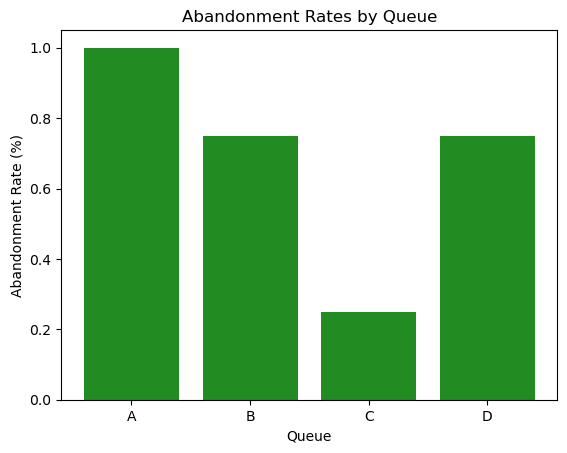

In [136]:
#Your code below:
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='forestgreen')
plt.title('Abandonment Rates by Queue')
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate (%)")
plt.show()

##### Record your answer below:

> Chart style you chose and why: Bar chart; it's the best for showing a comparison of rates belonging to discrete elements not linked to time.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [27]:
north = n_clean

In [28]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

C:\Users\fpose\AppData\Local\Temp\ipykernel_7988\3669384829.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(service_level.index)


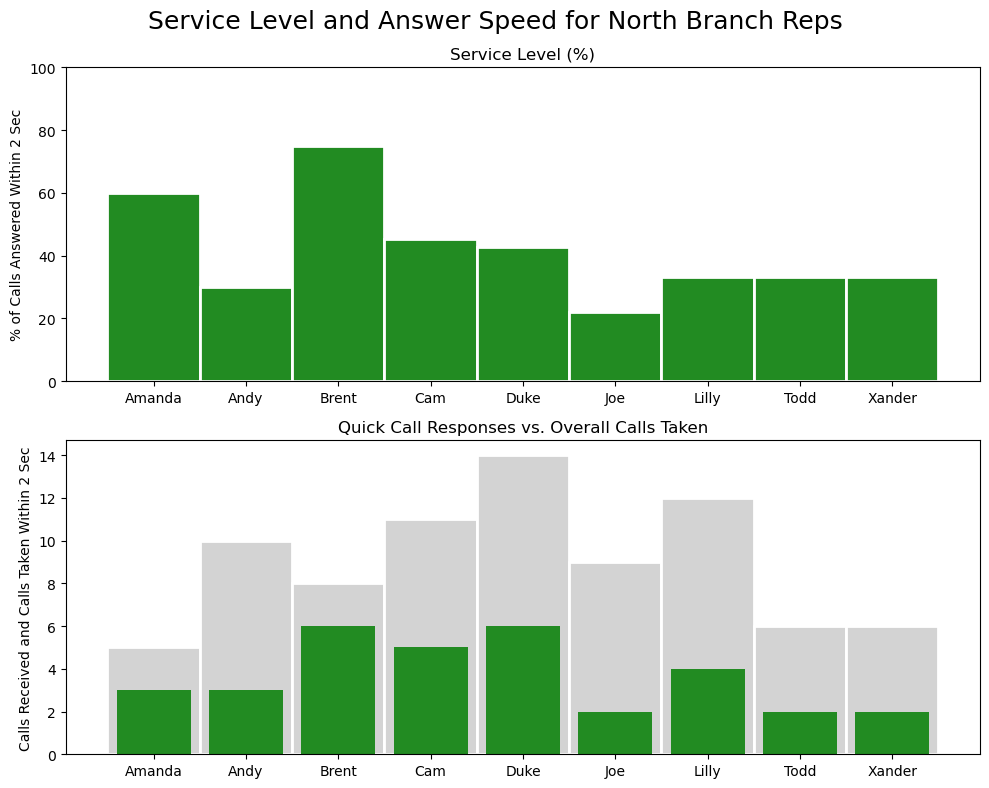

In [82]:
#Your Code Here:
fig, axes = plt.subplots(2,1, figsize = (10,8))

axes[0].bar(service_level.index,service_level["Service Level %"], width = 1, edgecolor = 'white', linewidth = 2, color = 'forestgreen')
axes[0].set_ylim(0,100)
axes[0].set_ylabel("% of Calls Answered Within 2 Sec")
axes[0].set_title("Service Level (%)")


axes[1].bar(total_stats.index, total_stats["Calls"], width = 1, color = 'lightgrey', edgecolor = 'white', linewidth = 2)
axes[1].bar(quick_stats.index,quick_stats["Calls"], width = 0.8, color = 'forestgreen')
axes[1].set_xticklabels(service_level.index)
axes[1].set_ylabel("Calls Received and Calls Taken Within 2 Sec")
axes[1].set_title("Quick Call Responses vs. Overall Calls Taken")

fig.suptitle("Service Level and Answer Speed for North Branch Reps", fontsize = 18)
plt.tight_layout()
plt.show()



##### Record your answer below:

> Chart style you chose and why: Top chart (percentage of calls taken) was chosen as a simple bar chart, which gives the greatest precision and readability for comparison. The bottom chart was designed as an overlapping chart to more effectively illustrate the differing workloads and proportional effectiveness of each one. The 'Calls Received' will theoretically always be a larger number and so it's safe to leave the representation as-is. Originally, the inner (green) and outer (grey) bars were the same width, though that conveyed a sense of stacked bars/summation rather than proportionality. A pie chart representation was briefly considered but would have been ineffective at showing proportionality. Good alternatives could have included a proportional scatter plot, though reading proportionality of circular plots is unintuitive, and overlapping points would have obfuscated important information, distracting from the fundamental question of the data (i.e. 'how effective is each representative?').

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: count, dtype: int64


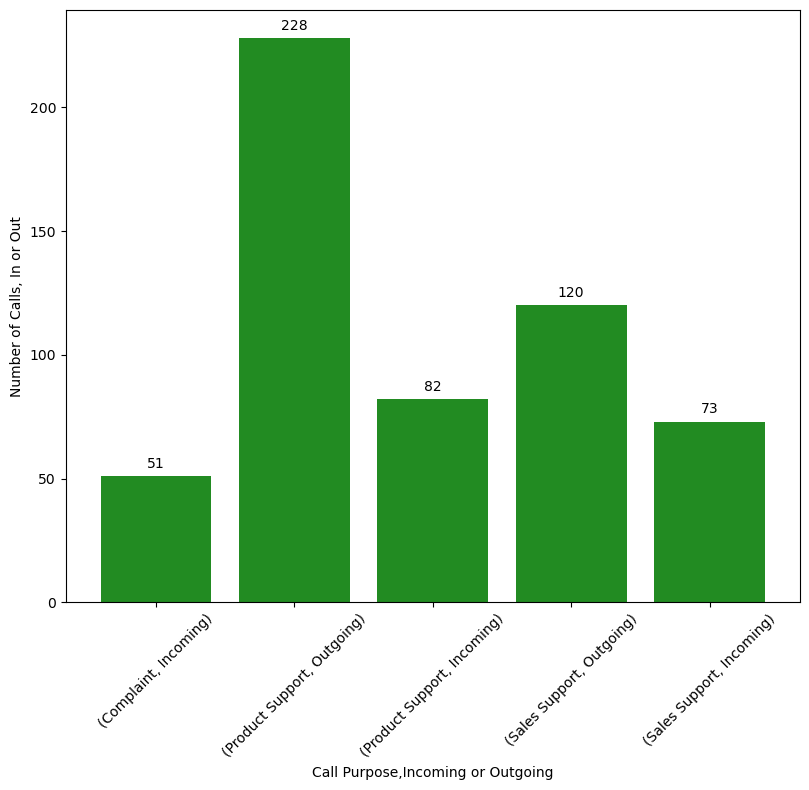

In [132]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
plt.figure(figsize = (8,8))
ax = purpose_counts.plot(x="labels", y=["Complaint", "Product Support", "Sales Support"], kind="bar", width  = .8, color = "forestgreen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel("Number of Calls, In or Out")
for c in ax.containers:
    ax.bar_label(c, padding=4, label_type = 'edge')

plt.show()


##### Record your answer below:

> Chart style you chose and why: Pie chart is initially enticing to show ratio of two elements, though again, are not a precise read. A percentile would make sense if we didn't care for the number of calls, though the wording ('how many') suggests that proportionality ('outgoing vs. incoming') AND precise number comparison are important. A stacked bar is also enticing, though since there is more interest in where to put resources (resources, in this case, being time and representatives), a stacked bar chart doesn't create an even grounding for the secondary value to be compared (which still represents time and resources) so we'll have to opt for a standard bar chart with labels for precision, though we should be ready to create a stacked plot in case shareholders are interested in such a presentation of the data.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined